# 1. Importing Required Libraries

This section imports the necessary Python libraries:

**pandas:** For data manipulation and analysis.

**requests:** For sending HTTP requests to fetch web pages.

**BeautifulSoup:** From the bs4 library, used for parsing HTML content.


In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# 2. Defining the URL and Parsing the HTML Content

Here, we define the URL for the UOB One credit card reviews page on Seedly and use the requests library to send a GET request to the page. The response is saved in the response variable.

In the next step, we parse the response content (HTML) using BeautifulSoup. The result is stored in the soup object, which we can now use to navigate and extract specific information from the web page.


In [2]:
# Indicate base url
url = 'https://seedly.sg/reviews/credit-cards/uob-one-card/'
response = requests.get(url)

In [3]:
soup = BeautifulSoup(response.text)
soup

<!DOCTYPE html>
<html><head><noscript><img alt="facebook" height="1" src="https://www.facebook.com/tr?id=1090273721022565&amp;ev=PageView&amp;noscript=1" style="display:none" width="1"/></noscript><link href="/favicon.ico" rel="icon" type="image/x-icon"/><link as="script" href="https://securepubads.g.doubleclick.net/tag/js/gpt.js" rel="preload"/><script async="" src="https://securepubads.g.doubleclick.net/tag/js/gpt.js"></script><link crossorigin="" href="https://fonts.gstatic.com/" rel="preconnect"/><link as="style" href="https://fonts.googleapis.com/css?family=Open+Sans:300,400,600,700,800&amp;display=swap" rel="preload"/><link href="https://fonts.googleapis.com/css?family=Open+Sans:300,400,600,700,800&amp;display=swap" rel="stylesheet"/><link as="style" href="https://fonts.googleapis.com/css?family=Montserrat:400,700&amp;display=swap" rel="preload"/><link href="https://fonts.googleapis.com/css?family=Montserrat:400,700&amp;display=swap" rel="stylesheet"/><meta content="width=device-

# 3. Extracting the Author Names and the Review Content

In this section, we search for all the HTML div elements that contain the class flex items-baseline, which holds the author information. For each author, we extract their name and print it.

This part of the code extracts the text of each review. We search for the li elements with the class mb-2 w-full lg:w-auto to locate the review elements. The review content is then extracted and printed.


In [4]:
# retrieve the author of each review
authors = soup.find_all("div", class_="flex items-baseline")
for author in authors:
    print(author.find("p", class_="text-xs font-bold").text)

Cliff Mendez
Shi Min Lim
Axe
Danny Lee
Soon Bing Xian
Nicholas Nick
L N
Jing Ting
Yinchoo lee
Loki Fu
Ong KL
hato
Christopher Tan


In [5]:
# retrieve reviews' text
reviews = soup.find_all("li", class_="mb-2 w-full lg:w-auto")
for review in reviews:
    print(review.find("div", class_="sc-e6b6ace3-0 dTtnnU").text)
    print()

I have had my own story of crypto scams due to referrals from some site, I lost a lot of money and i was still told to send more money to unlock my account because my balance was non-spendable or something else. Sadly i couldn’t count on the police so i reached out to a and luckily for me, I bsbforensic. c o m was able to get my money back. They showed me how every bitcoin transaction is traceable. Your crypto first goes to the scam wallet, from there the bitcoins will travel through some proxy wallets to cover the tracks. But, every single transaction is recorded in block chain. So your bitcoins can be traced to endpoint, which is some bitcoin exchange market. Where they are exchanged for real money. And then the exchanges in questions will have records of who received the money and how they received it. Contact them if you’ve similar issues, You’ll be grateful that you did

Good credit card to provide higher interest rates for your UOB ONE savings account (overall 3-4% depending on t

# 4. Extracting the Author Names and the Review Content

In this section, we create a dictionary data to store the authors and their respective reviews. After extracting the necessary information, we store it in a pandas DataFrame, which allows us to view and manipulate the data in a structured format.

In [6]:
# Parse the HTML content
soup = BeautifulSoup(response.text, 'html.parser')

# Initialize lists to store data
data = {
    'Author': [],
    'Reviews': []
}

# Extract authors and reviews
for item in soup.find_all('li', class_='mb-2 w-full lg:w-auto'):
    author = item.find('p', class_='text-xs font-bold').text.strip()
    review = item.find('div', class_='sc-e6b6ace3-0 dTtnnU').text.strip()
    
    # Store the data
    data['Author'].append(author)
    data['Reviews'].append(review)

# Create DataFrame
reviews_df = pd.DataFrame(data)
reviews_df

,Author,Reviews
0,Cliff Mendez,I have had my own story of crypto scams due to...
1,Shi Min Lim,Good credit card to provide higher interest ra...
2,Axe,Applied for this card years back along with on...
3,Soon Bing Xian,Pair up this card with the UOB ONE Savings acc...
4,L N,The longest CC I have. It is a great card to u...
5,Jing Ting,My to go card... mainly i used this card to ge...
6,Yinchoo lee,I personally use the one card and one account ...
7,Ong KL,"good for cashback, not too happy with the rece..."
8,hato,UOB One offers one of the best cash rebates pr...
9,Christopher Tan,Used this card for cash back needs. Its good w...


# 6. Installing Required Libraries

Before running the code to scrape data from websites, it is essential to ensure that you have the necessary libraries installed in your environment. The code below installs the following libraries:

- `requests-html`: A Python library for making requests to websites and scraping data.
- `selenium`: A library used for automating web browsers, especially useful when scraping JavaScript-heavy websites.
- `chromedriver_autoinstaller`: Automatically installs the correct version of ChromeDriver needed to control the Chrome browser with Selenium.

If these libraries are not already installed in your environment, you can install them by running the following commands:

```bash
!pip install requests-html
!pip install selenium
!pip install chromedriver_autoinstaller

In [7]:
!pip install requests-html

In [8]:
!pip install selenium

In [9]:
!pip install chromedriver_autoinstaller

# 6. Credit Card Review Scraper with Selenium and BeautifulSoup

This Python script scrapes customer reviews for five different credit cards from a review website using Selenium for browser automation and BeautifulSoup for parsing HTML content. The extracted reviews are then stored in a pandas DataFrame for further analysis or export.



In [1]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import time
from bs4 import BeautifulSoup
import chromedriver_autoinstaller  # Automatically install chromedriver


# URL dari 5 kartu kredit
urls = {
    'UOB One Card': 'https://seedly.sg/reviews/credit-cards/uob-one-card/',
    'Citi PremierMiles Visa Card': 'https://seedly.sg/reviews/credit-cards/citi-premiermiles-visa-card/',
    'UOB Ladys Card': 'https://seedly.sg/reviews/credit-cards/uob-lady-s-card/',
    'DBS Altitude Visa Signature Card': 'https://seedly.sg/reviews/credit-cards/dbs-altitude-visa-signature-card/',
    'HSBC Revolution Credit Card': 'https://seedly.sg/reviews/credit-cards/hsbc-revolution-credit-card/'
}

# Initialize Selenium WebDriver
service = Service()
driver = webdriver.Chrome(service=service)

# Initialize an empty DataFrame to store reviews from all cards
all_reviews_df = pd.DataFrame(columns=['Card', 'Review'])

# Function to extract reviews from the current page
def extract_reviews(soup, card_name):
    review_elements = soup.find_all('div', class_='dTtnnU')  # Replace with the correct class name for reviews
    reviews_list = []
    for review in review_elements:
        reviews_list.append(review.text.strip())
    return pd.DataFrame({'Card': card_name, 'Review': reviews_list})

# Loop through each card's URL, scrape reviews, and store them in the DataFrame
for card_name, url in urls.items():
    print(f"Scraping reviews for {card_name}...")
    driver.get(url)
    time.sleep(5)  # Adjust the sleep time as necessary
    
    # Scrape the first page
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    reviews_df = extract_reviews(soup, card_name)
    all_reviews_df = pd.concat([all_reviews_df, reviews_df], ignore_index=True)

    # Set the range of pages to scrape based on the card name
    if card_name == 'DBS Altitude Visa Signature Card':
        page_range = range(1, 11)  # Pages 1 to 10
    elif card_name == 'HSBC Revolution Credit Card':
        page_range = range(1, 6)  # Pages 1 to 5
    elif card_name == 'UOB Lady\'s Card':
        page_range = range(1, 2)  # Only 1 page (range(1, 2) to represent a single page)
    elif card_name == 'Citi PremierMiles Visa Card':
        page_range = range(1, 8)  # Pages 1 to 7
    else:
        page_range = range(1, 18)  # Default range for UOB One Card (Pages 2 to 17)

    # Click to load more pages and scrape reviews
    for page_number in page_range:
        try:
            next_page = driver.find_element(By.LINK_TEXT, str(page_number))
            next_page.click()
            time.sleep(5)
            soup = BeautifulSoup(driver.page_source, 'html.parser')
            reviews_df = extract_reviews(soup, card_name)
            all_reviews_df = pd.concat([all_reviews_df, reviews_df], ignore_index=True)
        except Exception as e:
            print(f"Could not find or click on page {page_number} for {card_name}: {e}")
            break

# Close the browser
driver.quit()


# Display the DataFrame
print(all_reviews_df)


Scraping reviews for UOB One Card...
Scraping reviews for Citi PremierMiles Visa Card...
Scraping reviews for UOB Ladys Card...
Could not find or click on page 2 for UOB Ladys Card: Message: no such element: Unable to locate element: {"method":"link text","selector":"2"}
  (Session info: chrome=128.0.6613.121); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x00007FF65F0A9412+29090]
	(No symbol) [0x00007FF65F01E239]
	(No symbol) [0x00007FF65EEDB1DA]
	(No symbol) [0x00007FF65EF2EFE7]
	(No symbol) [0x00007FF65EF2F23C]
	(No symbol) [0x00007FF65EF797C7]
	(No symbol) [0x00007FF65EF5672F]
	(No symbol) [0x00007FF65EF765A2]
	(No symbol) [0x00007FF65EF56493]
	(No symbol) [0x00007FF65EF209D1]
	(No symbol) [0x00007FF65EF21B31]
	GetHandleVerifier [0x00007FF65F3C871D+3302573]
	GetHandleVerifier [0x00007FF65F414243+3612627]
	GetHandleVerifier [0x00007FF65F40A417+3572135]


# 7. Displaying the DataFrame of Scraped Reviews

Here, all_reviews_df, which contains the reviews of all credit cards, is displayed in a DataFrame format to check the scraped data that has been processed previously.

In [2]:
# Display the DataFrame
print(all_reviews_df)

                            Card  \
0                   UOB One Card   
1                   UOB One Card   
2                   UOB One Card   
3                   UOB One Card   
4                   UOB One Card   
..                           ...   
422  HSBC Revolution Credit Card   
423  HSBC Revolution Credit Card   
424  HSBC Revolution Credit Card   
425  HSBC Revolution Credit Card   
426  HSBC Revolution Credit Card   

                                                Review  
0    I have had my own story of crypto scams due to...  
1    Good credit card to provide higher interest ra...  
2    Applied for this card years back along with on...  
3    Pair up this card with the UOB ONE Savings acc...  
4    The longest CC I have. It is a great card to u...  
..                                                 ...  
422  I applied for this card in mid May and 6 weeks...  
423  The credit card benefits is enticing. However,...  
424  i tried applying for the card on 24 apr, but y...

# 8. Sentiment Analysis Using TextBlob

- **The clean_text function** is used to clean the review text by converting it to lowercase and removing unnecessary characters.

- **The analyze_sentiment** function uses TextBlob to analyze the sentiment polarity of each review.

- **The sentiment** is classified into three categories: Positive, Neutral, or Negative based on the polarity score.

- **The final DataFrame**, now containing sentiment columns, is displayed.

In [3]:
from textblob import TextBlob

# Function to clean text
def clean_text(text):
    text = text.lower()
    text = text.replace('\n', ' ').replace('\r', '')
    return text

# Clean the reviews
all_reviews_df['Review_cleaned'] = all_reviews_df['Review'].apply(clean_text)

# Function for sentiment analysis
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Perform sentiment analysis on each review
all_reviews_df['Sentiment'] = all_reviews_df['Review_cleaned'].apply(analyze_sentiment)

# Classify the sentiment as Positive, Neutral, or Negative
all_reviews_df['Sentiment_Classification'] = all_reviews_df['Sentiment'].apply(
    lambda score: 'Positive' if score > 0.1 else ('Negative' if score < -0.1 else 'Neutral')
)

# Display the DataFrame with the reviews and their sentiment classification
print(all_reviews_df)

                            Card  \
0                   UOB One Card   
1                   UOB One Card   
2                   UOB One Card   
3                   UOB One Card   
4                   UOB One Card   
..                           ...   
422  HSBC Revolution Credit Card   
423  HSBC Revolution Credit Card   
424  HSBC Revolution Credit Card   
425  HSBC Revolution Credit Card   
426  HSBC Revolution Credit Card   

                                                Review  \
0    I have had my own story of crypto scams due to...   
1    Good credit card to provide higher interest ra...   
2    Applied for this card years back along with on...   
3    Pair up this card with the UOB ONE Savings acc...   
4    The longest CC I have. It is a great card to u...   
..                                                 ...   
422  I applied for this card in mid May and 6 weeks...   
423  The credit card benefits is enticing. However,...   
424  i tried applying for the card on 24 apr,

# 9. Saving the Sentiment Analysis Results to a CSV File

The final DataFrame, which contains both the reviews and sentiment analysis, is saved as an Excel file (.xlsx), making it accessible for future use.

In [4]:
# Save the DataFrame to a CSV file
all_reviews_df.to_excel('all_credit_card_reviews_sentiment.xlsx', index=False)

print("Reviews and sentiments saved to 'all_credit_card_reviews_sentiment.xlsx'")

Reviews and sentiments saved to 'all_credit_card_reviews_sentiment.xlsx'


# 10. Creating a WordCloud for Positive and Negative Reviews

- This section separates positive and negative reviews based on sentiment classification.

- Using WordCloud, a visual representation of frequently occurring words in positive and negative reviews is generated and displayed using matplotlib.

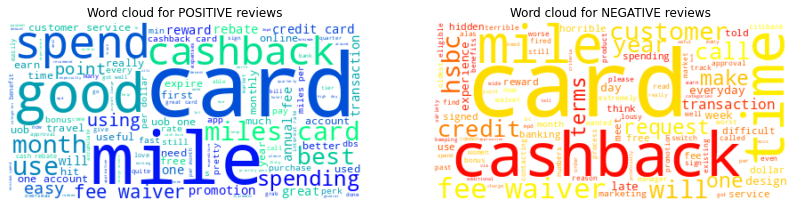

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt  

# Separate positive and negative reviews
positive_reviews = all_reviews_df[all_reviews_df['Sentiment_Classification'] == 'Positive']
negative_reviews = all_reviews_df[all_reviews_df['Sentiment_Classification'] == 'Negative']

# Combine all positive reviews for WordCloud
all_positive_reviews = " ".join(review for review in positive_reviews["Review_cleaned"])
all_negative_reviews = " ".join(review for review in negative_reviews["Review_cleaned"])

# Generate WordCloud for positive and negative reviews
positive_word_cloud = WordCloud(background_color="white", colormap="winter").generate(all_positive_reviews)
negative_word_cloud = WordCloud(background_color="white", colormap="autumn").generate(all_negative_reviews)

# Display both WordClouds using matplotlib
fig, axes = plt.subplots(1, 2, figsize=(14, 8))  # create two sets of axes to plot on

axes[0].imshow(positive_word_cloud, interpolation='bilinear')
axes[1].imshow(negative_word_cloud, interpolation='bilinear')

axes[0].set_title("Word cloud for POSITIVE reviews")
axes[1].set_title("Word cloud for NEGATIVE reviews")

axes[0].axis("off")
axes[1].axis("off")

plt.show()


# 11. Analyzing Sentiment for Specific Text

- This section provides an example of how TextBlob can be used to analyze the sentiment of specific sentences directly.

- The result is the sentiment polarity score for each text.

In [27]:
# Example of sentiment analysis with specific text
texts = ["The service was not bad", "The service was quite bad"]

for text in texts:
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    print(f"Text: '{text}' has a Sentiment Polarity: {polarity}")


Text: 'The service was not bad' has a Sentiment Polarity: 0.3499999999999999
Text: 'The service was quite bad' has a Sentiment Polarity: -0.6999999999999998


# 12. Crosstab Classification of Sentiments for Credit Cards

This code summarizes the sentiment classifications of reviews for each credit card using a crosstab.

- Sentiment Classification: After performing sentiment analysis on each review, the results are categorized as either Positive, Negative, or Neutral based on the sentiment score.

    - Positive: Polarity score > 0.1
    - Negative: Polarity score < -0.1
    - Neutral: Polarity score between -0.1 and 0.1

- Crosstab: The pd.crosstab function is used to display the count of each sentiment classification (positive, negative, neutral) for each credit card.

In [28]:
# Crosstabulate sentiment classification
print(pd.crosstab(all_reviews_df["Sentiment_Classification"], all_reviews_df["Card"]))


Card                      Citi PremierMiles Visa Card  \
Sentiment_Classification                                
Negative                                            5   
Neutral                                            11   
Positive                                           60   

Card                      DBS Altitude Visa Signature Card  \
Sentiment_Classification                                     
Negative                                                 1   
Neutral                                                 13   
Positive                                                93   

Card                      HSBC Revolution Credit Card  UOB Ladys Card  \
Sentiment_Classification                                                
Negative                                            5               4   
Neutral                                             7               4   
Positive                                           43              10   

Card                      UOB One Car